In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter  #aykırı gözlem için

In [89]:
test_df = pd.read_csv(r"/Users/baharzengoglu/Desktop/python kaynak/Titanic/test.csv")
test_df.head()
#test.csv dosyasında 418 gözlem, 11 sütun bulunmaktadır.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_df = pd.read_csv(r"/Users/baharzengoglu/Desktop/python kaynak/Titanic/train.csv")
train_df.head()

#train.csv datasında 891 gözlem, 12 sütun bulunmaktadır. Survived değişkeni ile (bağımlı değişken) yolcuların hayatta kalıp (1) kalmama (0) durumu incelenecektir.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#PassaengerId : Yolcu Numarası
#Survived : Hayatta kalma durumu (1,0)
#Pclass : Bilet Sınıfı (1,2,3)
#Name : Yolcu İsimleri
#Sex : Cinsiyet
#Age : Yaş
#SibSp : Kardeş ve eş sayısı
#Parch : Aile
#Ticket : Bilet No
#Fare : Bilet için ödenen fiyat
#Cabin : Kabin No
#Embarked : Hangi limandan binilmiş (Q, S, C)

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
#Kategorik değişken

In [8]:
train_df.describe(include = ["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [19]:
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# Kategorik ve sayısal değişkenler

In [24]:
cat_vars = train_df.select_dtypes(include=["object"]).columns  # Kategorik değişkenler
print("Kategorik değişkenler:", cat_vars.tolist())

Kategorik değişkenler: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [25]:
num_vars = train_df.select_dtypes(include=["number"]).columns  # Sayısal değişkenler

print("Sayısal değişkenler:", num_vars.tolist())

Sayısal değişkenler: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
#Bu tabloda gözükmeyen ancak kategorik değişken olarak adlandırılacak bazı gruplar var; SibSp, Parch gibi. Bunlar 1 den 8 e kadar değer alıp integer gibi görünebilir fakat  kategorik olarakta isimlendirilebilir. 

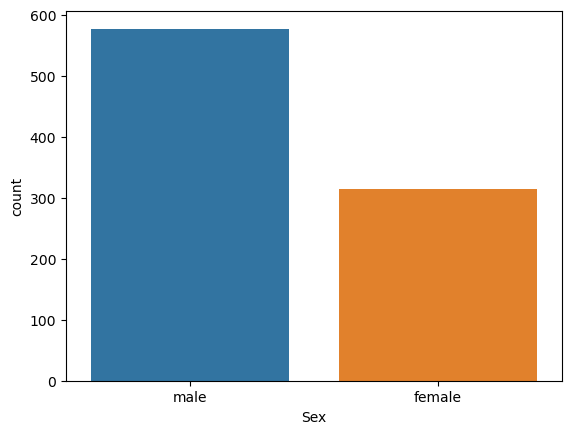

In [20]:
sns.countplot(x="Sex", data=train_df)
plt.show()

------------------
Survived
0    549
1    342
Name: count, dtype: int64


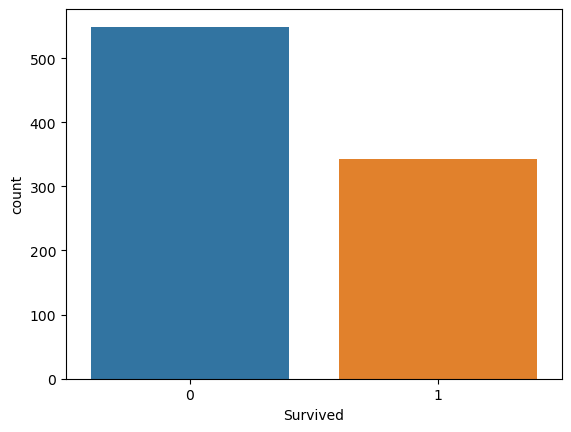

------------------
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


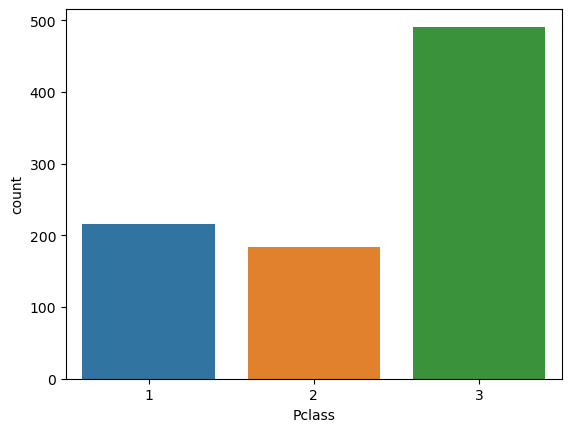

------------------
Sex
male      577
female    314
Name: count, dtype: int64


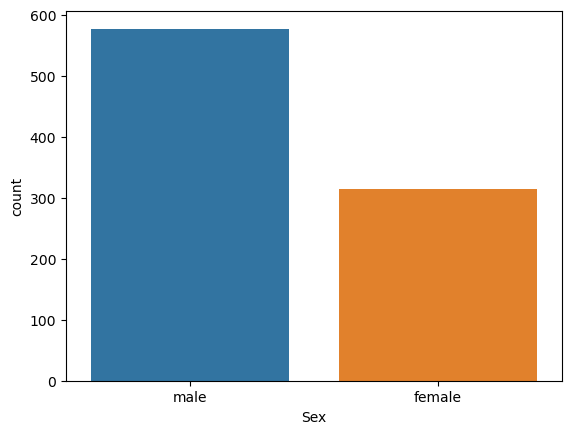

------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


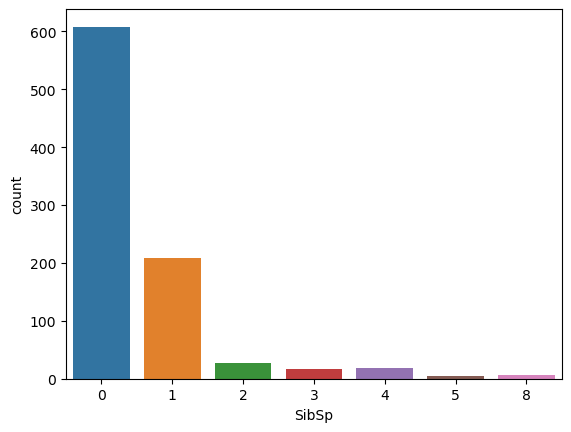

------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


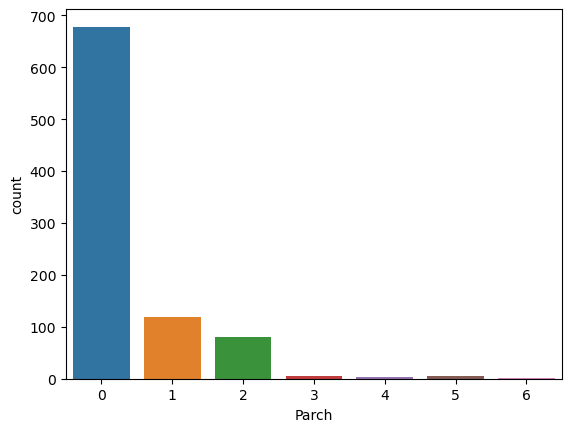

------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


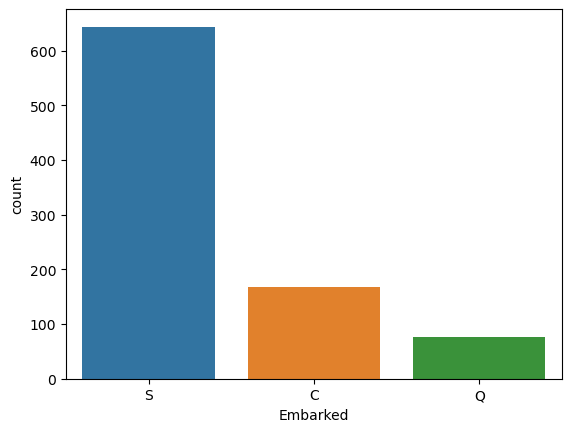

------------------
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


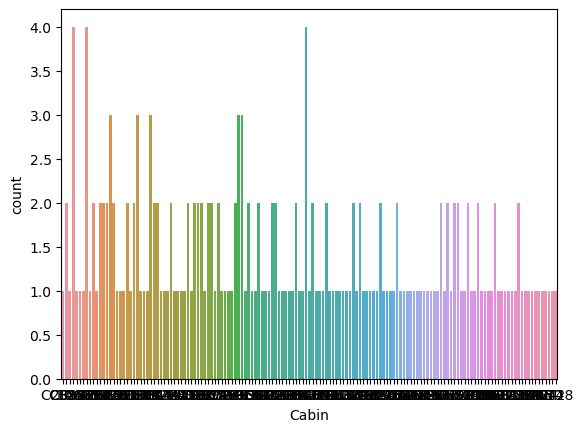

In [21]:
def category(degisken):
    print("------------------")
    print(train_df[degisken].value_counts())
    sns.countplot(x=degisken, data=train_df)
    plt.show()

category_list = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Cabin"]

for i in category_list:
    category(i)


In [ ]:
#Tek değişkenli sayısal analiz

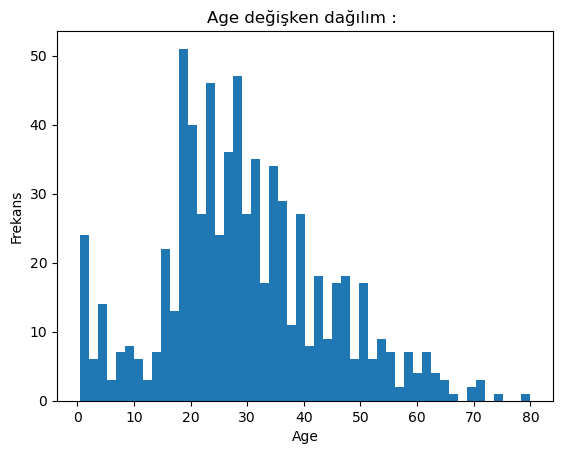

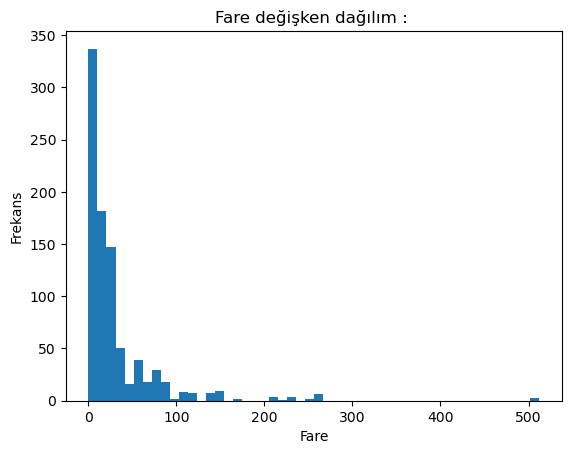

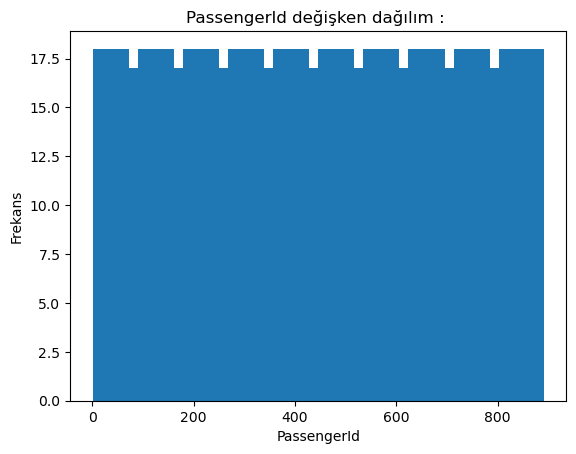

In [30]:
def sayisal(degisken):
    plt.hist(train_df[degisken], bins=50)
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("{} değişken dağılım : ".format(degisken))
    plt.show()
    
sayisal_list= ["Age", "Fare", "PassengerId"]

for i in sayisal_list:
    sayisal(i)


In [ ]:
#********

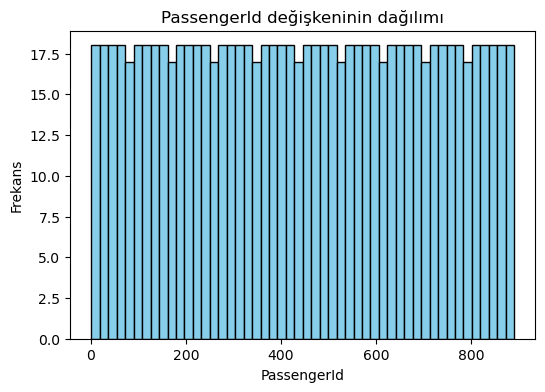

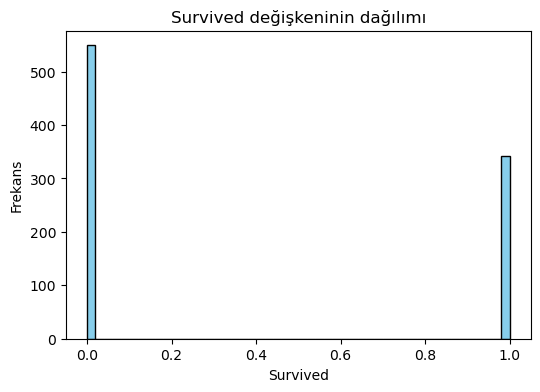

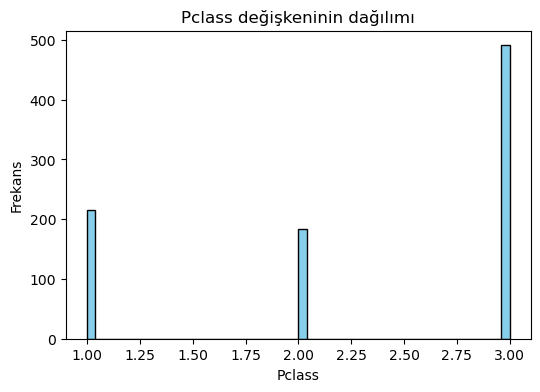

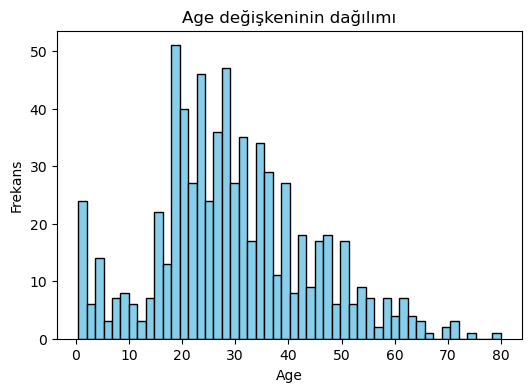

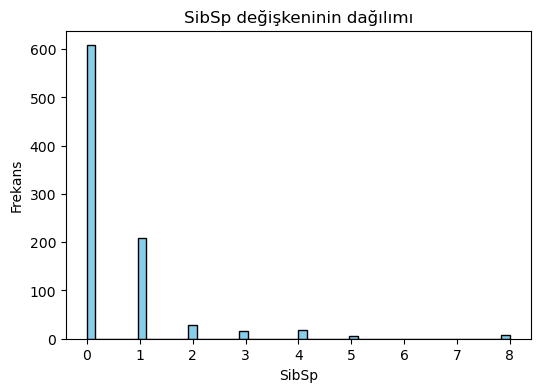

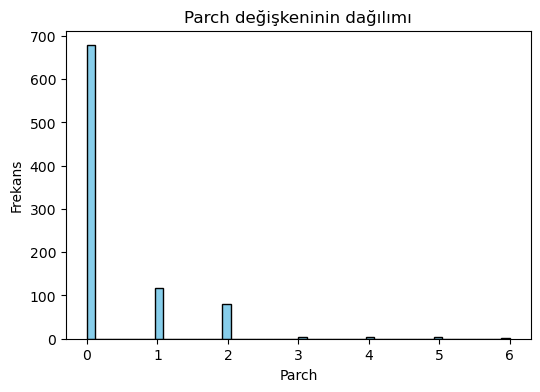

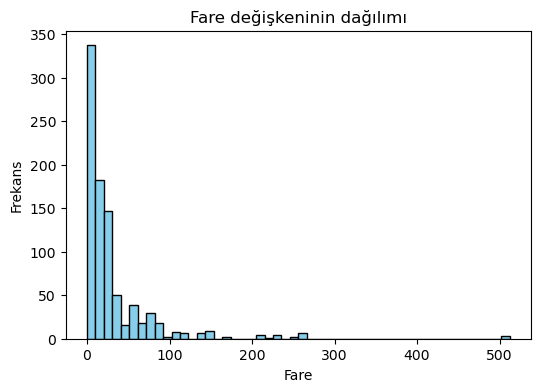

In [31]:
import matplotlib.pyplot as plt

def tum_sayisal_grafikler(df):
    # Tüm sayısal değişkenleri otomatik buldum
    sayisal_degiskenler = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    
    # Her biri için grafik çizdim
    for degisken in sayisal_degiskenler:
        plt.figure(figsize=(6,4))
        plt.hist(df[degisken].dropna(), bins=50, color="skyblue", edgecolor="black")
        plt.xlabel(degisken)
        plt.ylabel("Frekans")
        plt.title(f"{degisken} değişkeninin dağılımı")
        plt.show()

# Fonksiyonu çağırdım:
tum_sayisal_grafikler(train_df)

#dropna = eğer eksik veri varsa hata vermesin!

In [ ]:
#Çok Değişkenli analiz
#Gruplandırma yöntemi ile değişkenlerin birbiri üzerinde etkileri

In [32]:
train_df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

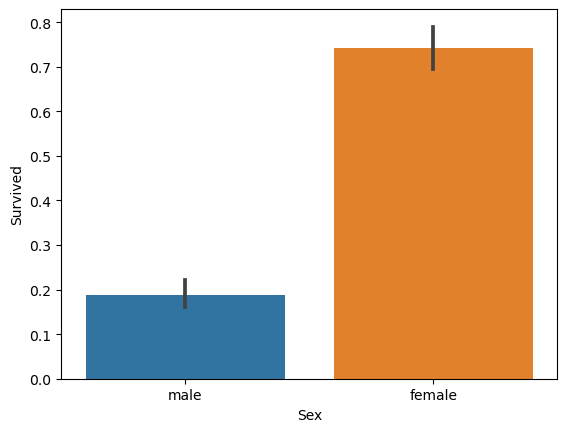

In [33]:
sns.barplot(x="Sex", y="Survived", data=train_df)

Pclass değişkenin surviveda etkisi :
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


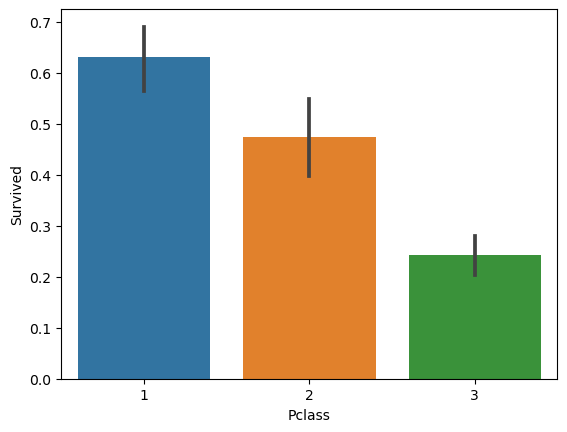

Sex değişkenin surviveda etkisi :
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


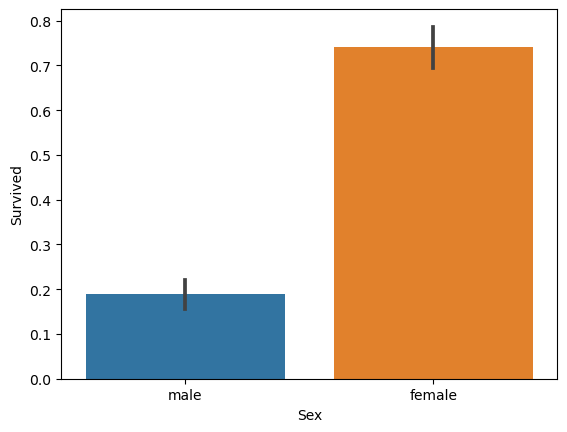

SibSp değişkenin surviveda etkisi :
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


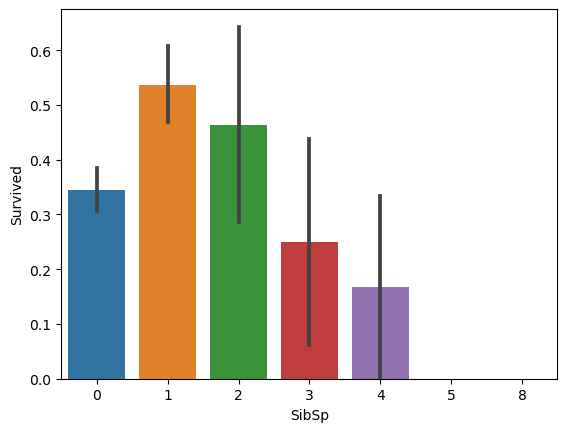

Parch değişkenin surviveda etkisi :
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


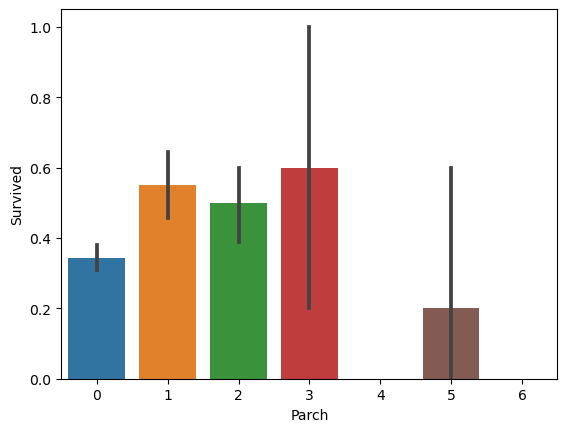

Embarked değişkenin surviveda etkisi :
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


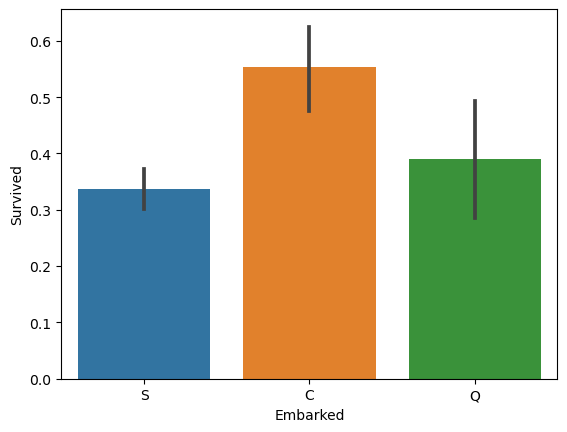

In [38]:
def kategorik_etki(degisken):
    print("{} değişkenin surviveda etkisi :".format(degisken))  
    print(train_df.groupby(degisken)["Survived"].mean())
    
    sns.barplot(x=degisken, y="Survived", data=train_df)
    plt.show()
    
list1=["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in list1:
    kategorik_etki(i)

In [ ]:
#sayısal değişkenin bağımlu değişkene etkisi

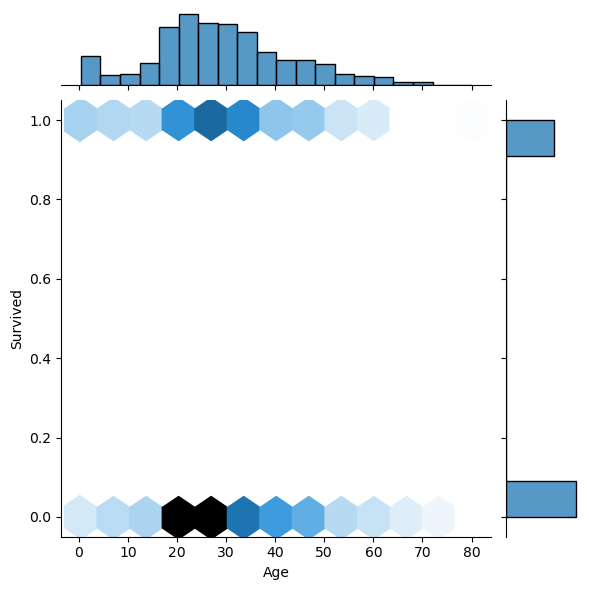

In [45]:
sns.jointplot(x="Age", y="Survived", data=train_df, kind="hex") #kind="reg", "kde", "hex" grafik görünümünü değiştiriyor. reg trend çizgisi, kde yoğunluk 

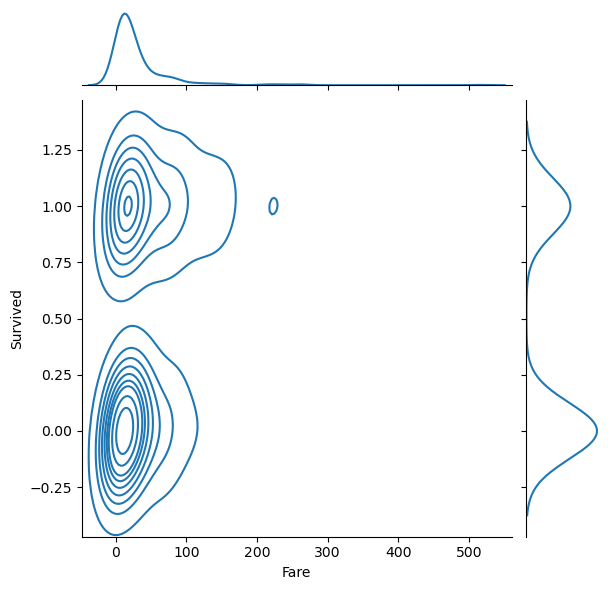

In [47]:
sns.jointplot(x="Fare", y="Survived", data=train_df, kind="kde")

In [ ]:
#2den fazla değişkenin birbirine etkisi
#heatmap, pairplot

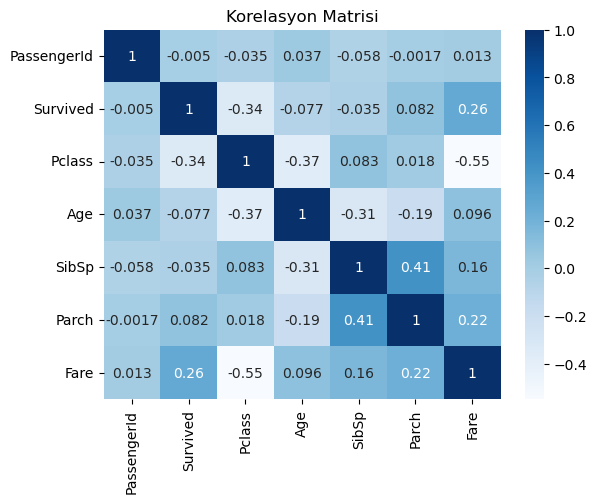

In [54]:
df1 = train_df.select_dtypes(include=["number"]).corr()  # sadece sayısal sütunları aldım #corr matris oluşturdum
sns.heatmap(df1, annot=True, cmap="Blues")
plt.title("Korelasyon Matrisi")
plt.show()  #ya da sns.pairplot(train_df)


/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


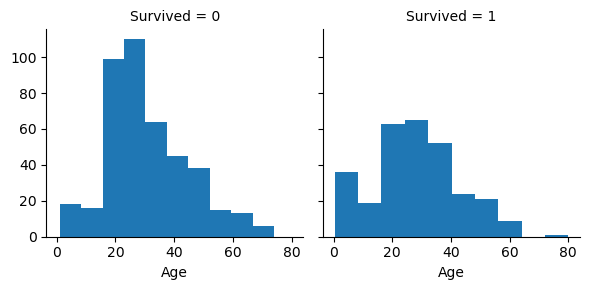

In [56]:
f=sns.FacetGrid(train_df, col="Survived") #Facetgrid ile değişkenlere göre satır ve sütun belirleyip istenilen değişkeni görebilirim. Bu grafikle survived değişkeni(yaşa göre)
f.map(plt.hist, "Age")

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


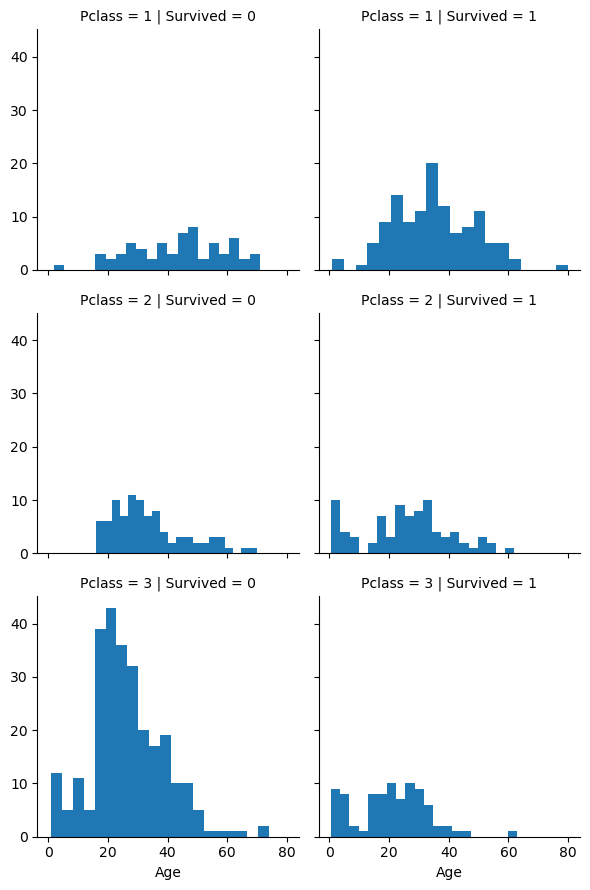

In [58]:
f1=sns.FacetGrid(train_df, row="Pclass", col="Survived")
f1.map(plt.hist, "Age", bins=20)

In [ ]:
#pclassın survived değişkenine age gibi bir etkisi görülüyor. makine öğrenmesi modeli için pclass kullanılmalıdır.

In [ ]:
#aykırı gözlem  veri seti içerisindeki değerlerin çok dışında kalan değerler (ortalama)

In [59]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
#Verilen değişkenler üzerinde aykırı değerleri tespit etmek ve aynı satırda birden fazla değişkende aykırı değer olarak tekrar eden gözlemleri bulma

In [65]:
Q1=train_df["Fare"].quantile(0.25)
Q3=train_df["Fare"].quantile(0.75)

IQR= Q3-Q1

alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR

toplam_filtre=((train_df["Fare"]<alt_sinir) | (train_df["Fare"]>ust_sinir))

aykiri_gozlemler= train_df["Fare"][toplam_filtre]
aykiri_gozlemler.index
train_df.loc[aykiri_gozlemler.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [85]:
def outlier(df, degiskenler):
    aykiri_indexler=[]
    
    for i in degiskenler:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        
        IQR= Q3-Q1
        
        alt_sinir=Q1-1.5*IQR
        ust_sinir=Q3+1.5*IQR
        
        toplam_filtre=((df[i]<alt_sinir) | (df[i]>ust_sinir))

        aykiri_gozlemler= df[i][toplam_filtre]
        aykiri_index= aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
       
    aykiri_indexler=Counter(aykiri_indexler)
     
    ortak_indexler=[i for i, v in aykiri_indexler.items() if v>=1]
    return ortak_indexler

ortak_indexler=outlier(train_df,["Age","SibSp","Parch","Fare"])
train_df.loc[ortak_indexler]
train_df=train_df.drop(ortak_indexler, axis=0).reset_index(drop=True)

In [86]:
ortak_indexler=outlier(train_df,["Age","SibSp","Parch","Fare"])
train_df.loc[ortak_indexler]
train_df=train_df.drop(ortak_indexler, axis=0).reset_index(drop=True)
print(f"Aykırı gözlem tespit edilen ve 2'den fazla değişkende tekrar eden indexler: {ortak_indexler}")


Aykırı gözlem tespit edilen ve 2'den fazla değişkende tekrar eden indexler: [115, 172, 213, 321, 359, 366, 378, 418, 461, 0, 2, 6, 12, 23, 26, 27, 28, 29, 33, 35, 36, 38, 46, 48, 63, 66, 70, 75, 77, 79, 82, 84, 86, 92, 93, 96, 99, 123, 128, 137, 145, 147, 161, 164, 165, 170, 173, 178, 200, 204, 208, 215, 217, 226, 230, 236, 238, 242, 243, 249, 255, 263, 264, 266, 279, 284, 285, 287, 290, 295, 299, 316, 317, 324, 341, 346, 358, 360, 367, 368, 374, 379, 385, 386, 396, 400, 405, 409, 412, 414, 415, 427, 443, 447, 448, 458, 468, 474, 481, 484, 487, 488, 497, 500, 513, 524, 543, 556, 571, 574, 575, 579, 585, 5, 17, 39, 49, 57, 76, 114, 117, 118, 122, 140, 179, 198, 205, 220, 229, 294, 304, 315, 322, 326, 337, 343, 389, 397, 402, 407, 423, 429, 431, 459, 472, 496, 511, 525, 531, 554, 562, 563, 566, 580, 595, 596]


In [84]:
def outlier_tek(df, degisken):
    Q1 = df[degisken].quantile(0.25)
    Q3 = df[degisken].quantile(0.75)
    IQR = Q3 - Q1
    
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    
    aykiri_gozlemler = df[(df[degisken] < alt_sinir) | (df[degisken] > ust_sinir)]
    print(f"{degisken} değişkenindeki aykırı gözlemler:")
    print(aykiri_gozlemler[[degisken]])
    print("------------")

for deg in ["Age", "SibSp", "Parch", "Fare"]:
    outlier_tek(train_df, deg)


Age değişkenindeki aykırı gözlemler:
      Age
32   66.0
53   65.0
94   71.0
114  70.5
275  65.0
449  65.0
486  71.0
623  80.0
665  70.0
841  74.0
------------
SibSp değişkenindeki aykırı gözlemler:
     SibSp
7        3
16       4
24       3
49       4
58       5
62       3
67       4
70       5
84       3
117      4
161      4
168      4
173      3
178      4
224      3
228      4
256      4
261      4
273      4
367      3
379      5
402      3
473      5
478      3
534      4
535      4
627      3
635      3
676      5
679      4
719      3
779      4
804      4
810      3
815      4
840      4
------------
Parch değişkenindeki aykırı gözlemler:
     Parch
7        1
8        2
10       1
13       5
16       1
..     ...
860      1
868      1
869      1
874      5
877      2

[202 rows x 1 columns]
------------
Fare değişkenindeki aykırı gözlemler:
         Fare
1     71.2833
30   146.5208
33    82.1708
51    76.7292
60    80.0000
..        ...
820   80.0000
826   83.1583
839   89.

In [ ]:
#Eksik Gözlem

In [87]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin'], dtype='object')

In [90]:
birleşim_df= pd.concat([train_df,test_df], axis=0).reset_index(drop =True)

In [91]:
birleşim_df.columns[birleşim_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin'], dtype='object')

In [92]:
birleşim_df[birleşim_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
594,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

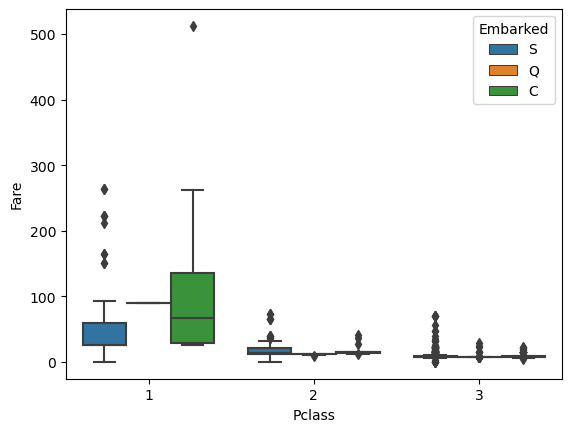

In [94]:
sns.boxplot(x="Pclass", y="Fare", data=birleşim_df,hue="Embarked")

In [97]:
birleşim_df.groupby(["Pclass","Sex", "Embarked"])["Fare"].mean()

Pclass  Sex     Embarked
1       female  C           120.579307
                Q            90.000000
                S            95.786988
        male    C            85.833330
                S            39.780931
2       female  C            24.325700
                Q            12.350000
                S            19.450943
        male    C            14.363245
                Q            11.489160
                S            16.659430
3       female  C            10.327254
                Q             8.376567
                S            13.387084
        male    C             9.221257
                Q             8.714722
                S             9.742188
Name: Fare, dtype: float64

In [99]:
birleşim_df["Fare"].fillna(9.742188, inplace=True)

In [100]:
birleşim_df[birleşim_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#Age

In [102]:
birleşim_df[birleşim_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
8,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
12,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
13,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
852,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
855,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
858,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#ilişkili olan kategorik değişkenler hangileri?

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


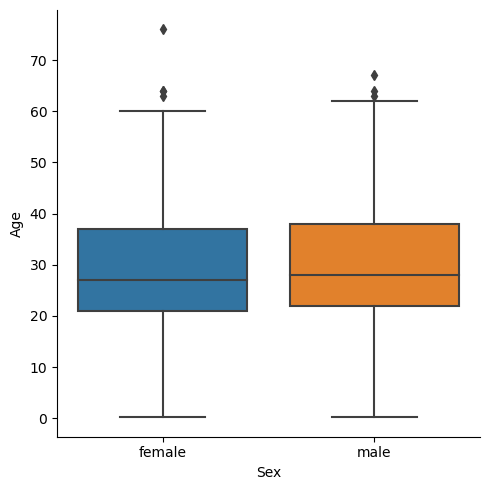

In [105]:
sns.catplot(x="Sex", y="Age", data=birleşim_df,kind="box")

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


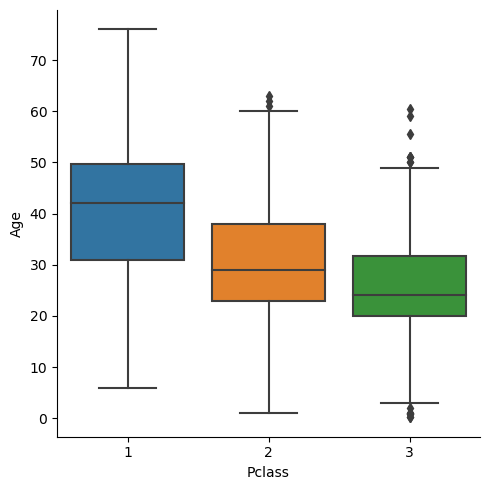

In [106]:
sns.catplot(x="Pclass", y="Age", data=birleşim_df,kind="box")

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


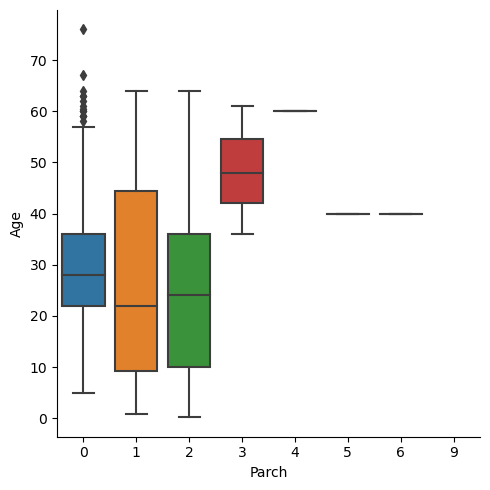

In [107]:
sns.catplot(x="Parch", y="Age", data=birleşim_df,kind="box")

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


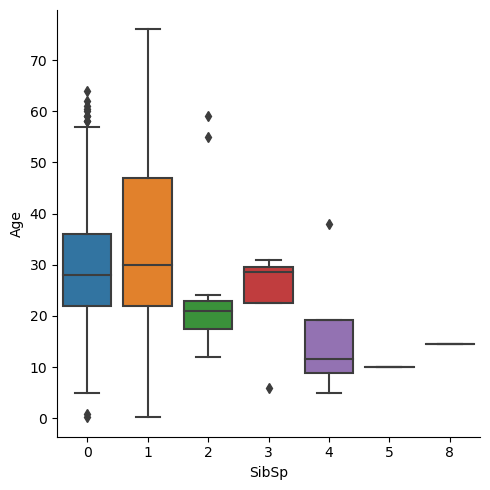

In [108]:
sns.catplot(x="SibSp", y="Age", data=birleşim_df,kind="box")

/Users/baharzengoglu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


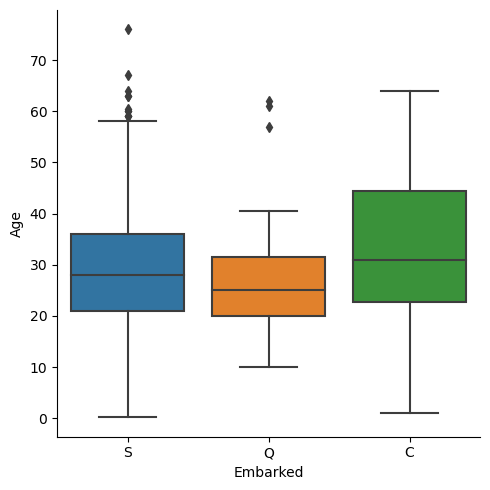

In [109]:
sns.catplot(x="Embarked", y="Age", data=birleşim_df,kind="box")

In [ ]:
#sex ve embarked dışında diğer sütunları alırım

In [118]:
liste = list(birleşim_df[birleşim_df["Age"].isnull()].index)

for i in liste:
    sibsp_val = birleşim_df.loc[i, "SibSp"]
    parch_val = birleşim_df.loc[i, "Parch"]
    pclass_val = birleşim_df.loc[i, "Pclass"]
    
    doldurulacak_age = birleşim_df[
        (birleşim_df["SibSp"] == sibsp_val) & 
        (birleşim_df["Parch"] == parch_val) & 
        (birleşim_df["Pclass"] == pclass_val)
    ]["Age"].median()
    
    if not np.isnan(doldurulacak_age):
        birleşim_df.loc[i, "Age"] = doldurulacak_age
    else:
        birleşim_df.loc[i, "Age"] = birleşim_df["Age"].median()


In [119]:
birleşim_df[birleşim_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#birleşim_df.loc[10, ["Age", "Fare"]] = 10. satırdaki Age ve Fare değerlerini getir 